In [87]:
import pandas as pd
import numpy as np
import math
import copy
import matplotlib.pyplot as plt

#Part A 1 Generate polynomial and interaction features for a given degree of the polynomial
def polynomialFeatures(X, degree):   
    pa = []
    for i in range(1,degree+1):
        l = list(itertools.combinations_with_replacement(X, i))
        for j in l:
            pa = pa + [np.prod(np.array(list(j)))]
            
   

    return pa;
degree = 3
polynomialFeatures([1, 4, 2, 10],degree)


[1,
 4,
 2,
 10,
 1,
 4,
 2,
 10,
 16,
 8,
 40,
 4,
 20,
 100,
 1,
 4,
 2,
 10,
 16,
 8,
 40,
 4,
 20,
 100,
 64,
 32,
 160,
 16,
 80,
 400,
 8,
 40,
 200,
 1000]

In [72]:
# Part A 2 Mean Squared Error
def mse(Y_true, Y_pred):
    mse = 0
    for i in range(0, len(Y_true)):
        mse = mse + pow((Y_true[i] - Y_pred[i]),2)
    mse = mse/len(Y_true)
    return mse
    
Y_true = [20, 30, 34, 53, 43]
Y_pred = [23, 28, 41, 59, 39]

mse(Y_true, Y_pred)

22.8

In [73]:
# Part A 3 Compute training and validation errors
# seperates array/matrix into k folds
def sHelper(x, k):
    cv_data = []
    mlt_fac = math.ceil(len(x)/k)
    cv_data = []
    cv_tmp = []
    counter = 0
    start = False
    for i in range(0, k):
        cv_tmp = []
        for j in range(0, len(x)):
            if( j == mlt_fac*i):
                start = True
            if(start==True):
                if(type(x[j])==int):
                    cv_tmp = cv_tmp + [x[j]]
                else:
                    cv_tmp = cv_tmp + x[j]
                count = counter + 1
            if(counter == mlt_fac):
                count = 0
                start = False
    return x


# Object used to hold data for learning curve
class Dummy:
    def __init__(self):
        self.X = np.array([])
        self.Y = np.array([])
        self.w = np.array([])

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        if( len(X) == len(X[0])):
            self.w = np.matmul(np.linalg.inv(self.X),np.transpose(self.Y))
        else:
            self.w = np.matmul(np.linalg.inv(np.matmul(np.transpose(self.X), self.X)),  np.matmul(np.transpose(self.X),self.Y))
    def predict(self, X):
        y_hat = np.matmul(X, self.w)
        return y_hat

# Computes Training Scores & Validation Scores
def learning_curve(model, X, Y, cv, train_size=1, learning_rate=0.01, epoches=1000, tol=None, regularization=None, lambd=0.0, **kwargs):

    train_scores = []
    avg_cv = []

    for i in range(1, train_size+1):
        x = X[0:train_size*i][:]
        y = Y[0:train_size*i]

        # create model for data
        model.fit(x,y)
        train_scores = train_scores + [math.sqrt(mse(y,model.predict(x)))]

        x = x.tolist()
        y = y.tolist()
        x = sHelper(x,cv)
        y = sHelper(y,cv)
        
        avg_cv_tmp = []
        for j in range(0, cv):
            cv_x = copy.copy(x)
            cv_y = copy.copy(y)
            cv_x_test = cv_x.pop(j)
            cv_y_test = [cv_y.pop(j)]

            model.fit(cv_x, cv_y)
            cv_y_hat = [model.predict(cv_x_test)]

            avg_cv_tmp = avg_cv_tmp + [math.sqrt(mse(cv_y_test,cv_y_hat))]
        
        avg_cv = avg_cv + [np.mean(avg_cv_tmp)]


    return train_scores, avg_cv


   
# training data
X = np.array([[2,3,5,2,4],[2,4,5,2,5],[3,2,3,5,8],[3,2,4,5,2],[2,5,5,1,8],[2,3,2,3,5],[3,4,2,5,6],[2,3,4,5,6],[2,3,4,4,5],[3,5,4,8,9],[9,9,8,4,5],[8,4,2,8,7],
              [3,9,5,4,5],[3,2,4,6,5],[2,3,4,2,5],[9,3,4,3,4],[9,3,2,3,4],[2,3,4,2,4],[2,3,5,2,5],[2,4,5,3,9],[2,3,4,2,5],[2,5,4,5,9],[2,3,9,8,4],[3,5,6,8,4],
              [2,5,8,9,5]])
# training labels
Y = np.array([3,6,3,5,7,4,5,3,4,5,2,3,8,4,5,3,4,5,3,4,3,5,6,5,6]) 

model = Dummy()

train_scores, val_scores = learning_curve(model, X, Y, 5, train_size = 5)

print("Training Scores: ", train_scores)
print("Validation Scores: ", val_scores)

Training Scores:  [1.8630587706705477e-15, 0.6566468105638373, 1.3900533388507215, 1.6061332211223076, 1.4577669900813204]
Validation Scores:  [4.550390625, 1.7042103533962725, 2.152668214896568, 2.0939137189702666, 1.764287349091105]


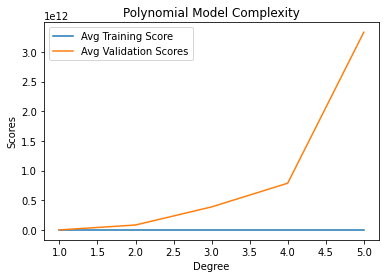

In [88]:
# Part A 4 Compute training and validation errors for various polynomial degrees



def plot_polynomial_model_complexity(model, X, Y, cv, maxPolynomialDegree, learning_rate=0.01, epoches=1000, tol=None, regularizer=None, lambd=0.0, **kwargs):
    train_scores = []
    val_scores = []
    x_axis = []

    for i in range(1, maxPolynomialDegree+1):
        poly_x = []
        poly_y = []
        for j in range(0, len(X)):
            poly_x = poly_x + [polynomialFeatures(X[j],i)]
        poly_y = polynomialFeatures(Y,i)
        tmp_train_scores, tmp_val_scores = learning_curve(model, np.array(poly_x), np.array(poly_y), cv, train_size = 5)
        train_score = np.mean(tmp_train_scores)
        val_score = np.mean(tmp_val_scores)
        train_scores = train_scores + [train_score]
        val_scores = val_scores + [val_score]
        x_axis.append(i)

    #plot data
    plt.xlabel('Degree')
    plt.ylabel('Scores')
    plt.plot(x_axis, train_scores, label="Avg Training Score")
    plt.plot(x_axis, val_scores, label="Avg Validation Scores")
    plt.title("Polynomial Model Complexity")
    plt.legend()
    plt.show()
    
    

model = Dummy()
    
plot_polynomial_model_complexity(model, X, Y, 5, 5)

In [121]:
# part A 5 Linear Regression Model 
class Linear_Regression:
    def __init__(self):
        self.X = np.array([])
        self.Y = np.array([])
        self.learning_rate = 0.0
        self.epochs = 0
        self.tol = None
        self.regulizer = None
        self.lambd = None
        self.theta = []
        
    def fit(self, X, Y, learning_rate=0.01, epochs=1000, tol=None, regularizer=None,lambd=0.0, **kwargs):
        self.X = X
        self.Y = Y
        self.learning_rate = params['learning_rate']
        self.epochs = params['epochs']
        self.tol = params['tol']
        self.regulizer = params['regulizer']
        self.lambd = params['lambd']
        
        
        for i in range(0, self.epochs):
            self.theta = np.subtract(self.theta,((self.learning_rate/len(self.X))*(np.matnul(np.transpose(self.X),np.subtract(np.matnul(self.X,self.theta),self.Y)))))               
        
        
            
    def predict(self, X):
        y_hat = np.matmul(X, self.theta)
        return y_hat 
    
            

In [120]:
def cost_function(x,y,theta):
        j = 0
        for i in range(0, len(x)):
            j = j + pow(y[i] - np.matmul(np.transpose(theta), x[i]),2)
        j = j/(2 * len(y))
        
        return j
    
x = [[3,2,3],[2,3,4],[3,3,4]]
y = [2,3,4]
theta = [20,20,20]
j = cost_function(x,y,theta)
print(j)

15784.833333333334


In [114]:
# part B 6 read in winequality-white.csv file 
data = pd.read_csv('winequality-white.csv',sep=";")

In [115]:
# part B 7 summarize data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [116]:
# part B 8 shuffle rows of data
data=data.sample(frac=1)

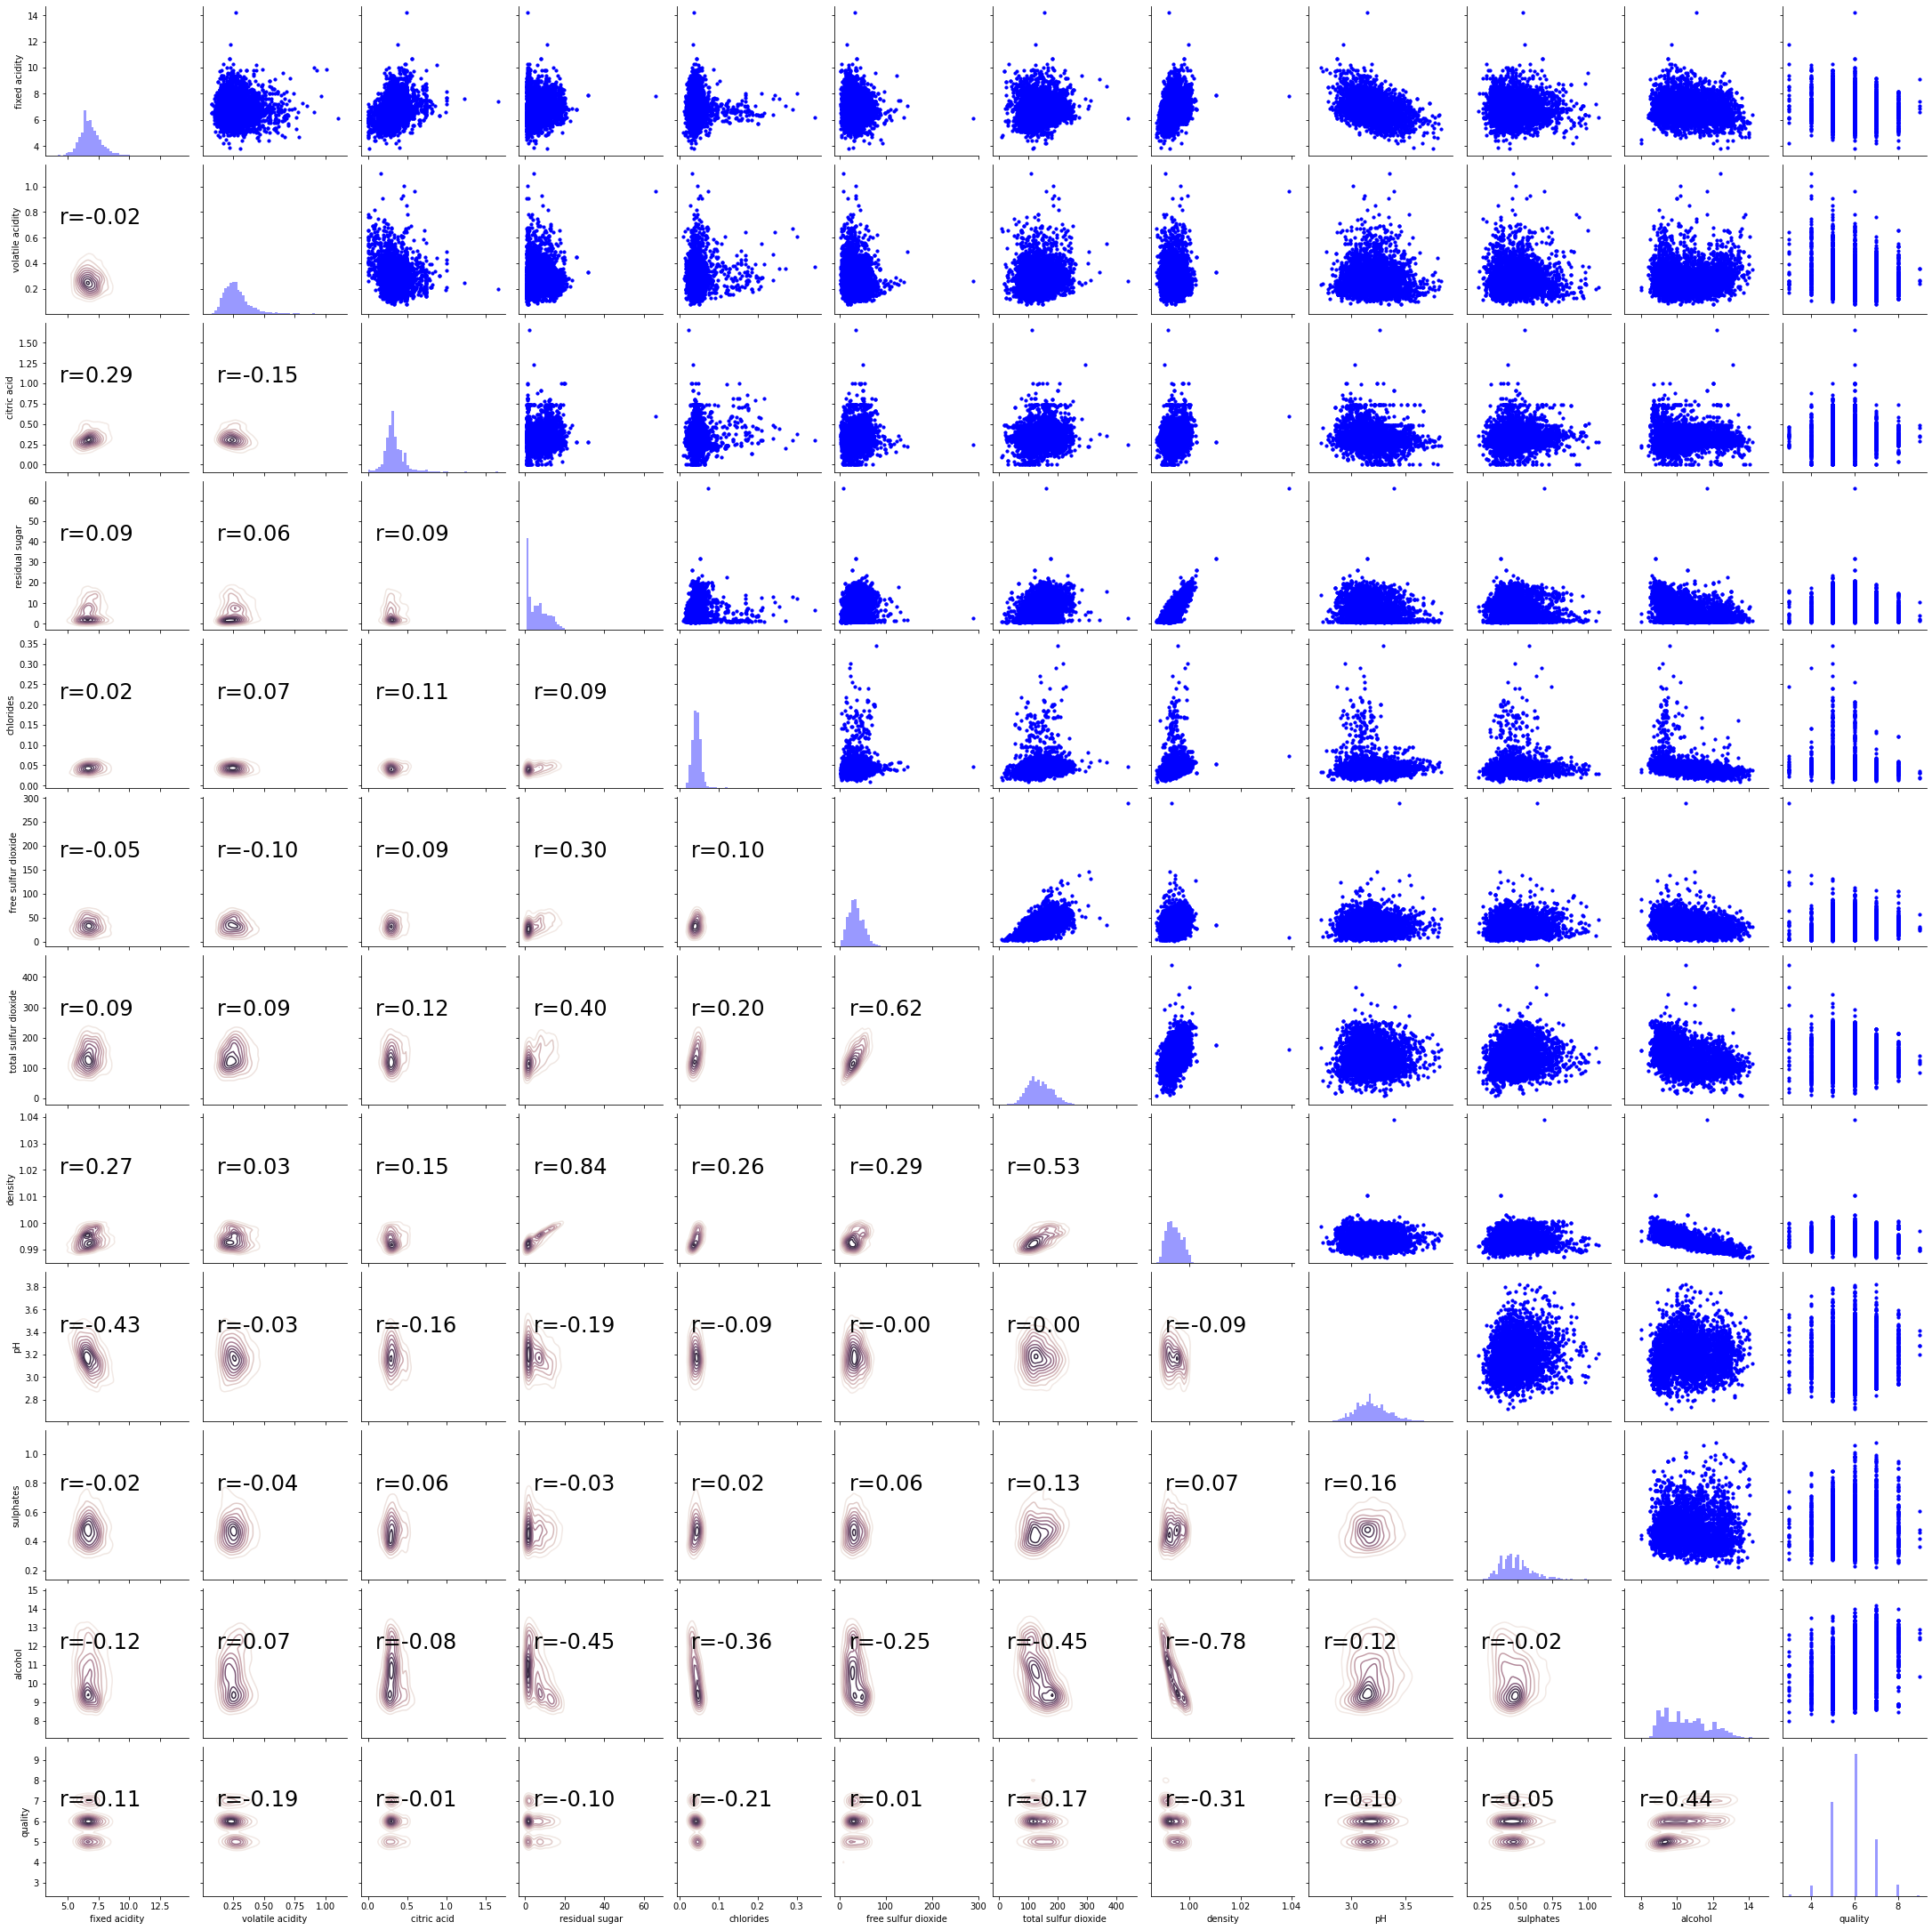

In [118]:
# part B 9 generate pair plots
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

def corrfunc(x,y, **kws):
   r,_= stats.pearsonr(x,y)
   ax = plt.gca()
   ax.annotate("r={:.2f}".format(r), xy =(.1,.6), xycoords = ax.transAxes, size = 24)
cmap = sns.cubehelix_palette(light = 1, dark = 0.1, hue = 0.5, as_cmap = True)
sns.set_context(font_scale=2)
#Pair grid set up
g = sns.PairGrid(data)
#Scatter plot on the upper triangle
g.map_upper(plt.scatter, s = 10, color = 'blue')
#Distribution on the diagonal
g.map_diag(sns.distplot, kde = False, color = 'blue')
#Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [124]:
# part C 10 model selection via hyperparamete tuning
def kFold(model, X, Y,lambd, learning_rate, regularizer):
    dict = []
    for lm in lambd:
        for lr in learning_rate:
            for rg in regularizer:
                print("kFold")
    
    return dict
    
    
lambd = [1.0, 0, 0.1, 0.01, 0.001, 0.0001]
learning_rate = [0.1, 0.01, 0.001, 0.001]
regularizer = [11, 12]

model = Linear_Regression()

dic = kFold(model, X, Y,lambd, learning_rate, regularizer)
print(dic)

kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
kFold
[]
